## <font color='Blue'> Telecom Churn.</font>

![](https://miro.medium.com/v2/resize:fit:1400/1*Xj5QTBN7umWESE_YrrDlhw.png)

#### This dataset contains detailed information about customers of a telecom company, including demographics, service subscriptions, billing information, and churn status. It captures key aspects such as whether a customer has phone or internet services, their tenure with the company, usage of additional services like online security, and their chosen payment methods. The dataset is particularly useful for analyzing patterns and factors that contribute to customer churn, helping the company understand and potentially mitigate reasons for customer departure.

#### Here we will use the "Telecom Customers Churn.csv" database that has been made available for use, below you will see an analysis of the data, the processing of this data and the use of the learning classification of machine models to achieve our goal.

In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-customers/Telecom Customers Churn.csv


#### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import ScalarFormatter

## <font color='blue'> 1. Importing Dataset. </font>

In [112]:
df = pd.read_csv("/kaggle/input/telecom-customers/Telecom Customers Churn.csv")

#### Here we can see that we have categorical and continuous variables:

- customerID: Unique identifier for each customer.
- gender: Customer's gender (e.g., Male, Female).
- SeniorCitizen: Indicates if the customer is a senior citizen (1 = Yes, 0 = No).
- Partner: Whether the customer has a partner (Yes/No).
- Dependents: Whether the customer has dependents (Yes/No).
- tenure: Number of months the customer has stayed with the company.
- PhoneService: Indicates if the customer has phone service (Yes/No).
- MultipleLines: Whether the customer has multiple phone lines (Yes/No/No phone service).
- InternetService: Type of internet service (DSL, Fiber optic, No).
- OnlineSecurity: Whether the customer has online security service (Yes/No/No internet).
- OnlineBackup: Whether the customer has online backup service (Yes/No/No internet).
- DeviceProtection: Whether the customer has device protection service (Yes/No/No internet).
- TechSupport: Whether the customer has technical support service (Yes/No/No internet).
- StreamingTV: Whether the customer has streaming TV service (Yes/No/No internet).
- StreamingMovies: Whether the customer has streaming movie service (Yes/No/No internet).
- Contract: Type of customer contract (Month-to-month, One year, Two year).
- PaperlessBilling: Whether the customer is on paperless billing (Yes/No).
- PaymentMethod: Customer's payment method (e.g., Bank transfer, Credit card, Electronic check).
- MonthlyCharges: Monthly amount charged to the customer.
- TotalCharges: Total amount charged to the customer to date.
- Churn: Indicates whether the customer has left the service (Yes/No).

In [5]:
pd.set_option('display.max_columns', None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
unique_counts = df.nunique()
print(unique_counts)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


#### Here, we can observe that we have 21 columns and 7,043 entries. Additionally, we can confirm that there are no missing values, meaning no imputation or treatment is required.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [114]:
df = df.dropna()

In [115]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### A quick glance at our data reveals no discrepancies in the continuous variables, so no immediate treatment is required. We'll revisit this later to see if anything arises.

In [10]:
pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000,7032.000,7032.000,7032.000
mean,0.162,32.422,64.798,2283.300
std,0.369,24.545,30.086,2266.771
min,0.000,1.000,18.250,18.800
25%,0.000,9.000,35.587,401.450
50%,0.000,29.000,70.350,1397.475
75%,0.000,55.000,89.862,3794.738
max,1.000,72.000,118.750,8684.800


## <font color='blue'> 2. Data Analysis. </font>

### Categorial Variables.

#### We can see that our dataset contains a large number of categorical variables, so let's start by examining their behavior:

- Gender: The gender distribution is well-balanced, with nearly the same number of male and female customers.
- Senior Citizen: 84% of our customers are not considered senior citizens, though 16% of them fall into this category.
- Partner: Our customer base is evenly split, with approximately 50% having a partner and 50% being single.
- Dependents: 70% of our customers do not have dependents.
- Phone Service: A key point is that 90% of our customers subscribe to phone services.
- Multiple Lines: The most noteworthy insight here is that 42% of customers have more than one phone line.
- Internet Service: 78% of customers have an internet subscription.
- Online Security, Backup, Device Protection, Tech Support: Among customers with internet service, around 55% do not subscribe to these additional services on average.
- Streaming TV and Movies: Roughly 50% of internet users also use streaming services.
- Contract: 55% of our customers are on month-to-month contracts.
- Paperless Billing: 60% of customers do not opt for paper billing.
- Payment Method: Payment methods are fairly balanced across the four categories, though electronic checks have a slight edge in usage.
- Churn: The target variable is imbalanced, with significantly more "No" than "Yes" responses. Only 26.5% of customers have churned, which is the key outcome we want to predict.

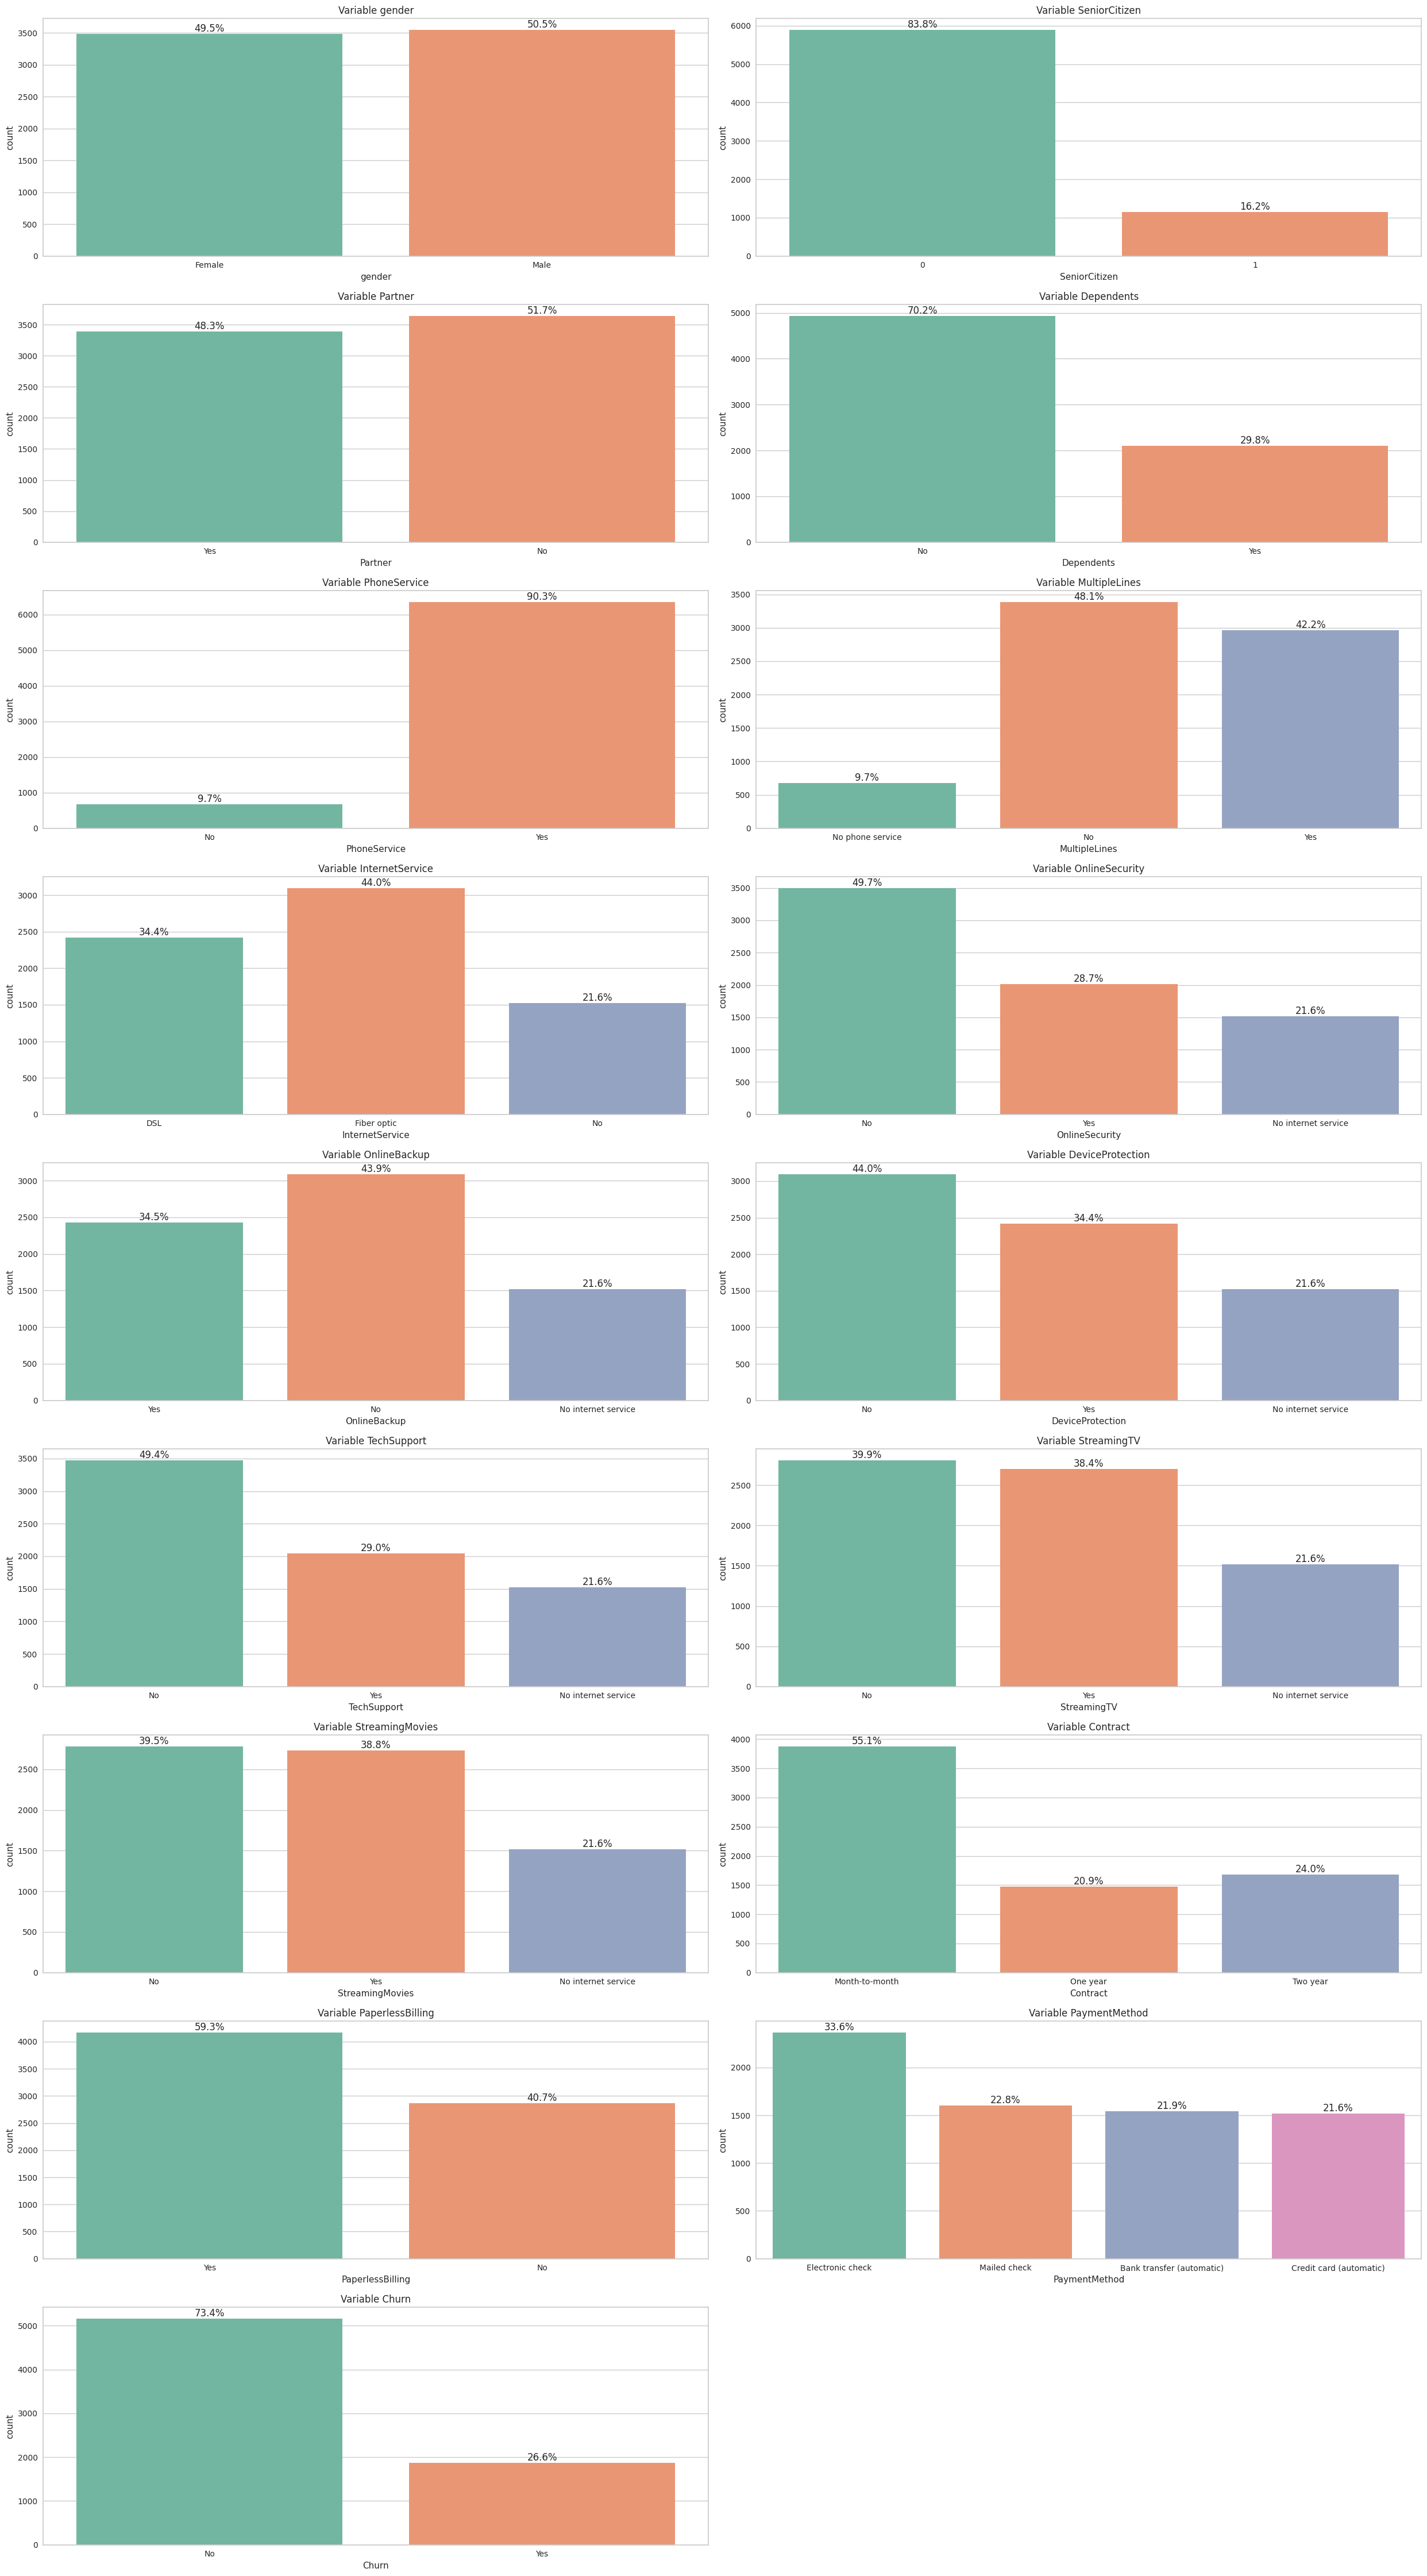

In [6]:
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.figure(figsize=(25, 45))

plt.subplot(9, 2, 1)
plt.gca().set_title('Variable gender')
ax1 = sns.countplot(x='gender', palette='Set2', data=df)
add_percentage(ax1, len(df['gender']))

plt.subplot(9, 2, 2)
plt.gca().set_title('Variable SeniorCitizen')
ax2 = sns.countplot(x='SeniorCitizen', palette='Set2', data=df)
add_percentage(ax2, len(df['SeniorCitizen']))

plt.subplot(9, 2, 3)
plt.gca().set_title('Variable Partner')
ax3 = sns.countplot(x='Partner',  palette='Set2', data=df)
add_percentage(ax3, len(df['Partner']))

plt.subplot(9, 2, 4)
plt.gca().set_title('Variable Dependents')
ax4 = sns.countplot(x='Dependents', palette='Set2', data=df)
add_percentage(ax4, len(df['Dependents']))

plt.subplot(9, 2, 5)
plt.gca().set_title('Variable PhoneService')
ax5 = sns.countplot(x='PhoneService',  palette='Set2', data=df)
add_percentage(ax5, len(df['PhoneService']))

plt.subplot(9, 2, 6)
plt.gca().set_title('Variable MultipleLines')
ax6 = sns.countplot(x='MultipleLines',  palette='Set2', data=df)
add_percentage(ax6, len(df['MultipleLines']))

plt.subplot(9, 2, 7)
plt.gca().set_title('Variable InternetService')
ax7 = sns.countplot(x='InternetService',  palette='Set2', data=df)
add_percentage(ax7, len(df['InternetService']))

plt.subplot(9, 2, 8)
plt.gca().set_title('Variable OnlineSecurity')
ax8 = sns.countplot(x='OnlineSecurity',  palette='Set2', data=df)
add_percentage(ax8, len(df['OnlineSecurity']))

plt.subplot(9, 2, 9)
plt.gca().set_title('Variable OnlineBackup')
ax9 = sns.countplot(x='OnlineBackup',  palette='Set2', data=df)
add_percentage(ax9, len(df['OnlineBackup']))

plt.subplot(9, 2, 10)
plt.gca().set_title('Variable DeviceProtection')
ax10 = sns.countplot(x='DeviceProtection',  palette='Set2', data=df)
add_percentage(ax10, len(df['DeviceProtection']))

plt.subplot(9, 2, 11)
plt.gca().set_title('Variable TechSupport')
ax11 = sns.countplot(x='TechSupport',  palette='Set2', data=df)
add_percentage(ax11, len(df['TechSupport']))

plt.subplot(9, 2, 12)
plt.gca().set_title('Variable StreamingTV')
ax12 = sns.countplot(x='StreamingTV',  palette='Set2', data=df)
add_percentage(ax12, len(df['StreamingTV']))

plt.subplot(9, 2, 13)
plt.gca().set_title('Variable StreamingMovies')
ax13 = sns.countplot(x='StreamingMovies',  palette='Set2', data=df)
add_percentage(ax13, len(df['StreamingMovies']))

plt.subplot(9, 2, 14)
plt.gca().set_title('Variable Contract')
ax14 = sns.countplot(x='Contract',  palette='Set2', data=df)
add_percentage(ax14, len(df['Contract']))

plt.subplot(9, 2, 15)
plt.gca().set_title('Variable PaperlessBilling')
ax15 = sns.countplot(x='PaperlessBilling',  palette='Set2', data=df)
add_percentage(ax15, len(df['PaperlessBilling']))

plt.subplot(9, 2, 16)
plt.gca().set_title('Variable PaymentMethod')
ax16 = sns.countplot(x='PaymentMethod',  palette='Set2', data=df)
add_percentage(ax16, len(df['PaymentMethod']))

plt.subplot(9, 2, 17)
plt.gca().set_title('Variable Churn')
ax17 = sns.countplot(x='Churn',  palette='Set2', data=df)
add_percentage(ax17, len(df['Churn']))

plt.tight_layout()
plt.show()

### Continuous Variables.

#### In this section, we will evaluate our continuous variables to gain insights into their behavior and understand how they impact our customer base.

- Tenure: We observe a peak of new customers, followed by a balanced distribution over the subsequent months. This suggests that, while we were maintaining a consistent rate of new customers, there was recently a surge in new sign-ups.
- Monthly Charges: Most customers seem to be using basic plans or promotional offers, as there is a high concentration around the minimum charge value.
- Total Charges: While the majority of customers haven't spent a significant amount with the company, there is also a notable segment of loyal customers with higher spending, showing a distribution that extends toward higher values.

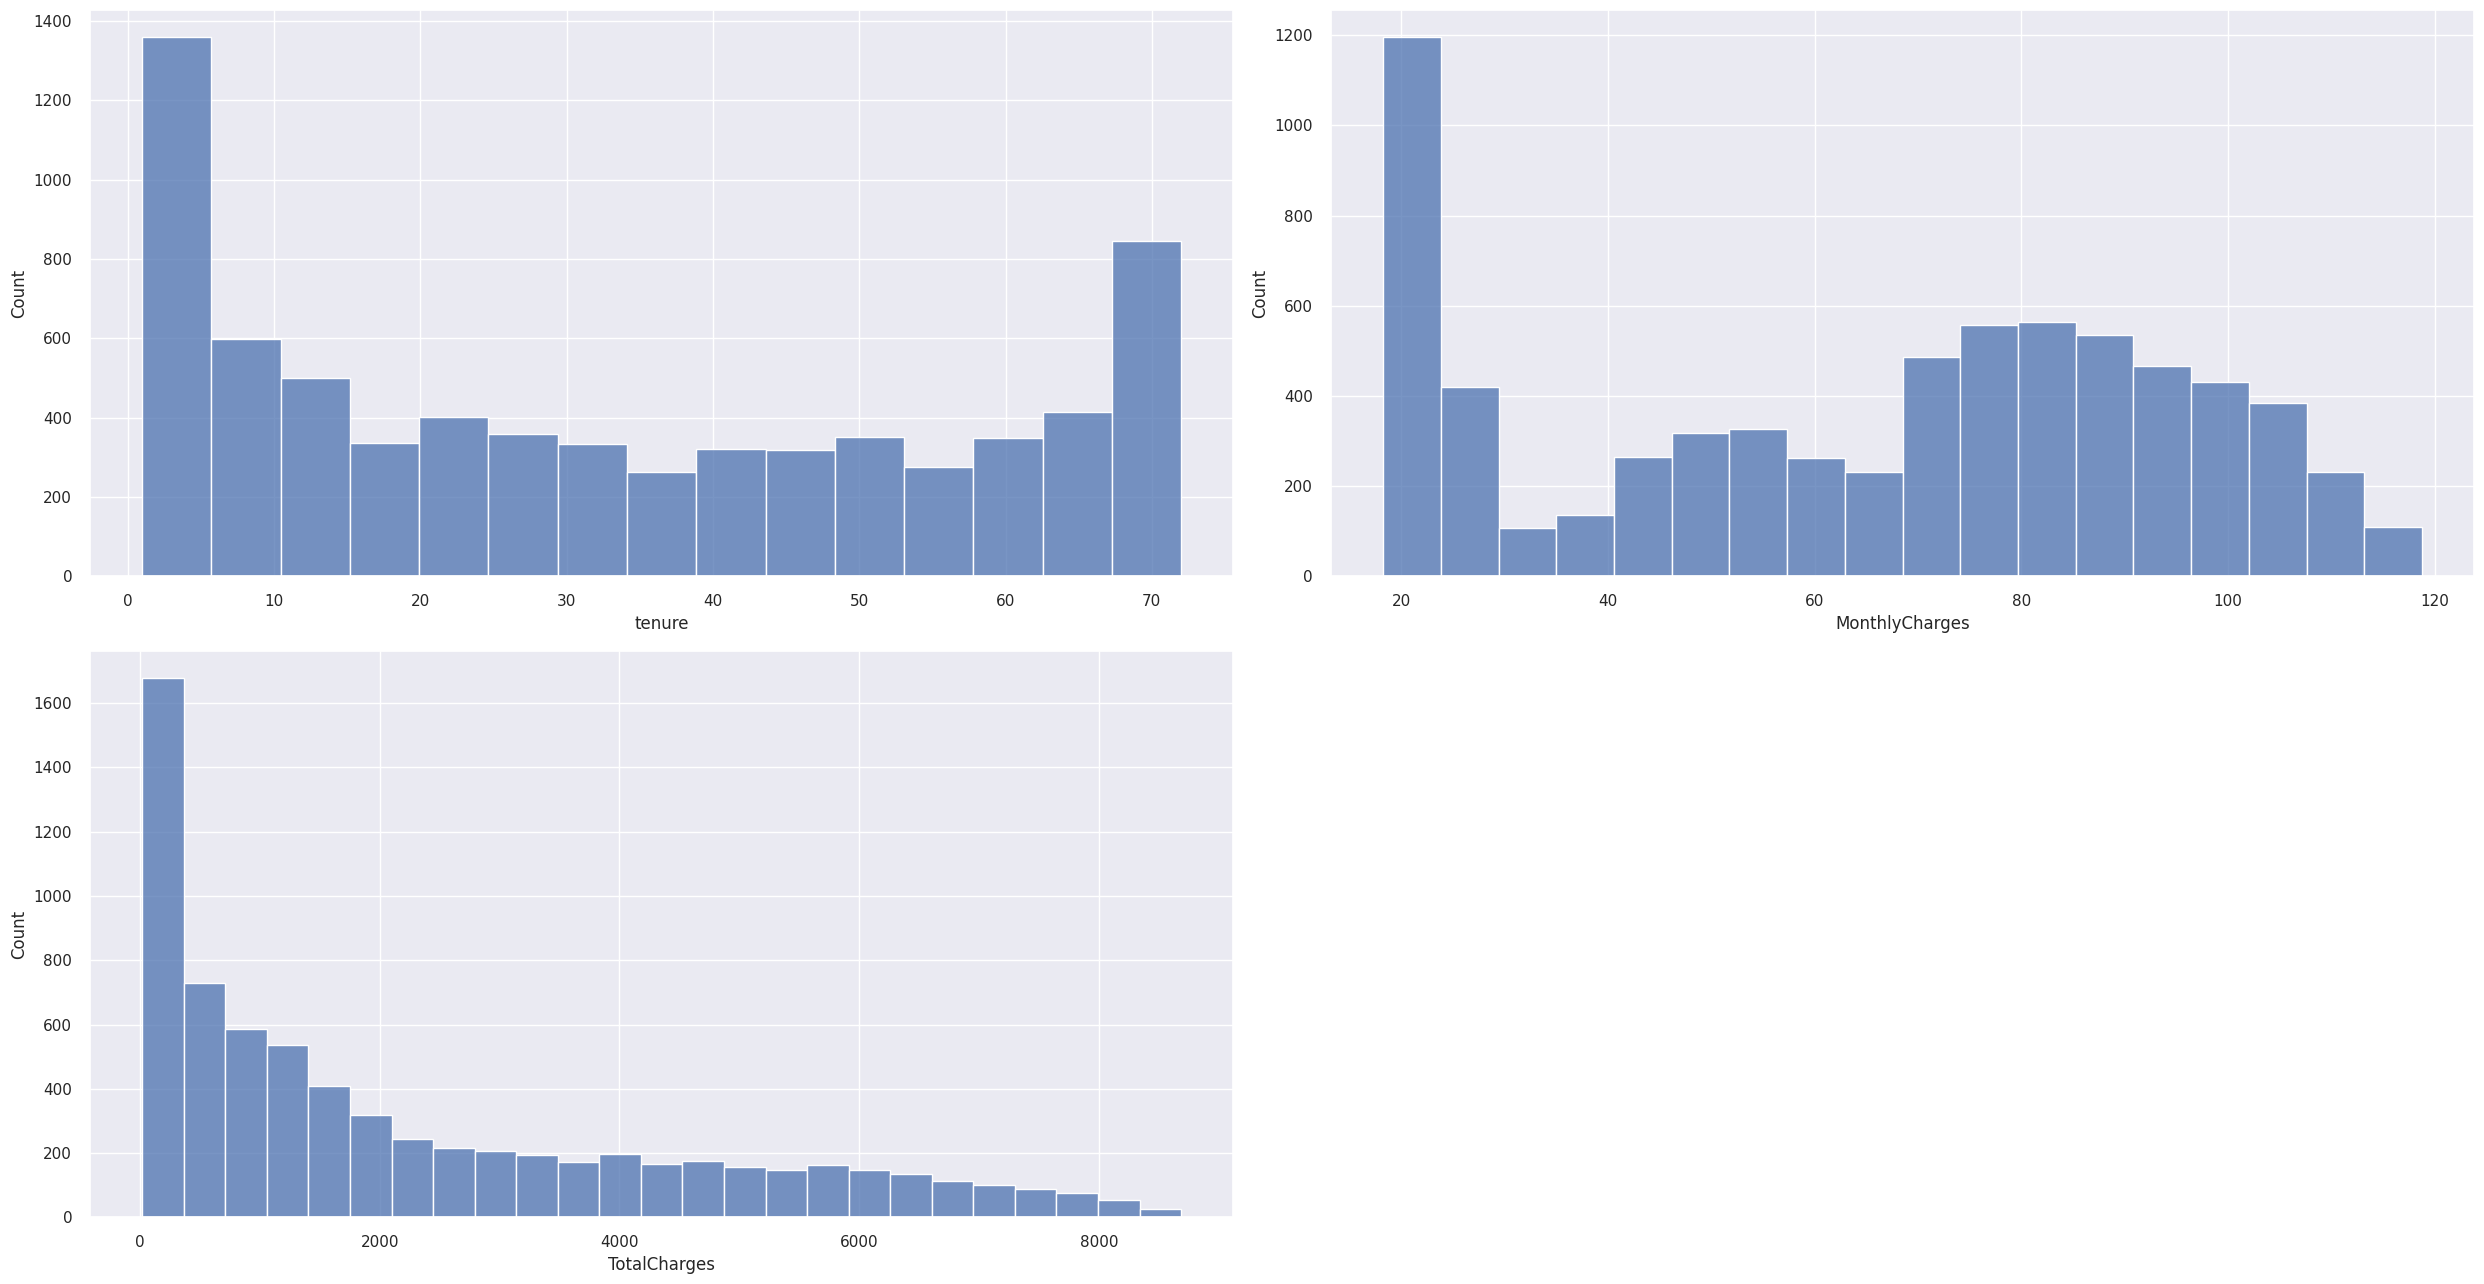

In [8]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(25, 13))
sns.set(color_codes=True)


def create_histogram(data, subplot_position):
    ax = plt.subplot(2, 2, subplot_position) 
    sns.histplot(data, kde=False, ax=ax)
    
    # Definir formato do eixo Y
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.ticklabel_format(useOffset=False) 

# Criar histogramas
create_histogram(df['tenure'], 1)
create_histogram(df['MonthlyCharges'], 2)
create_histogram(df['TotalCharges'], 3)

plt.tight_layout()
plt.show()

#### By examining our boxplots, we can confirm that there are no outliers, which is quite significant as it indicates that our data does not have any major distortions. Additionally, we can observe key information such as the median of our monthly charges, which falls between 70 and 80, and the total charges, which range from 1,700 to 2,000.

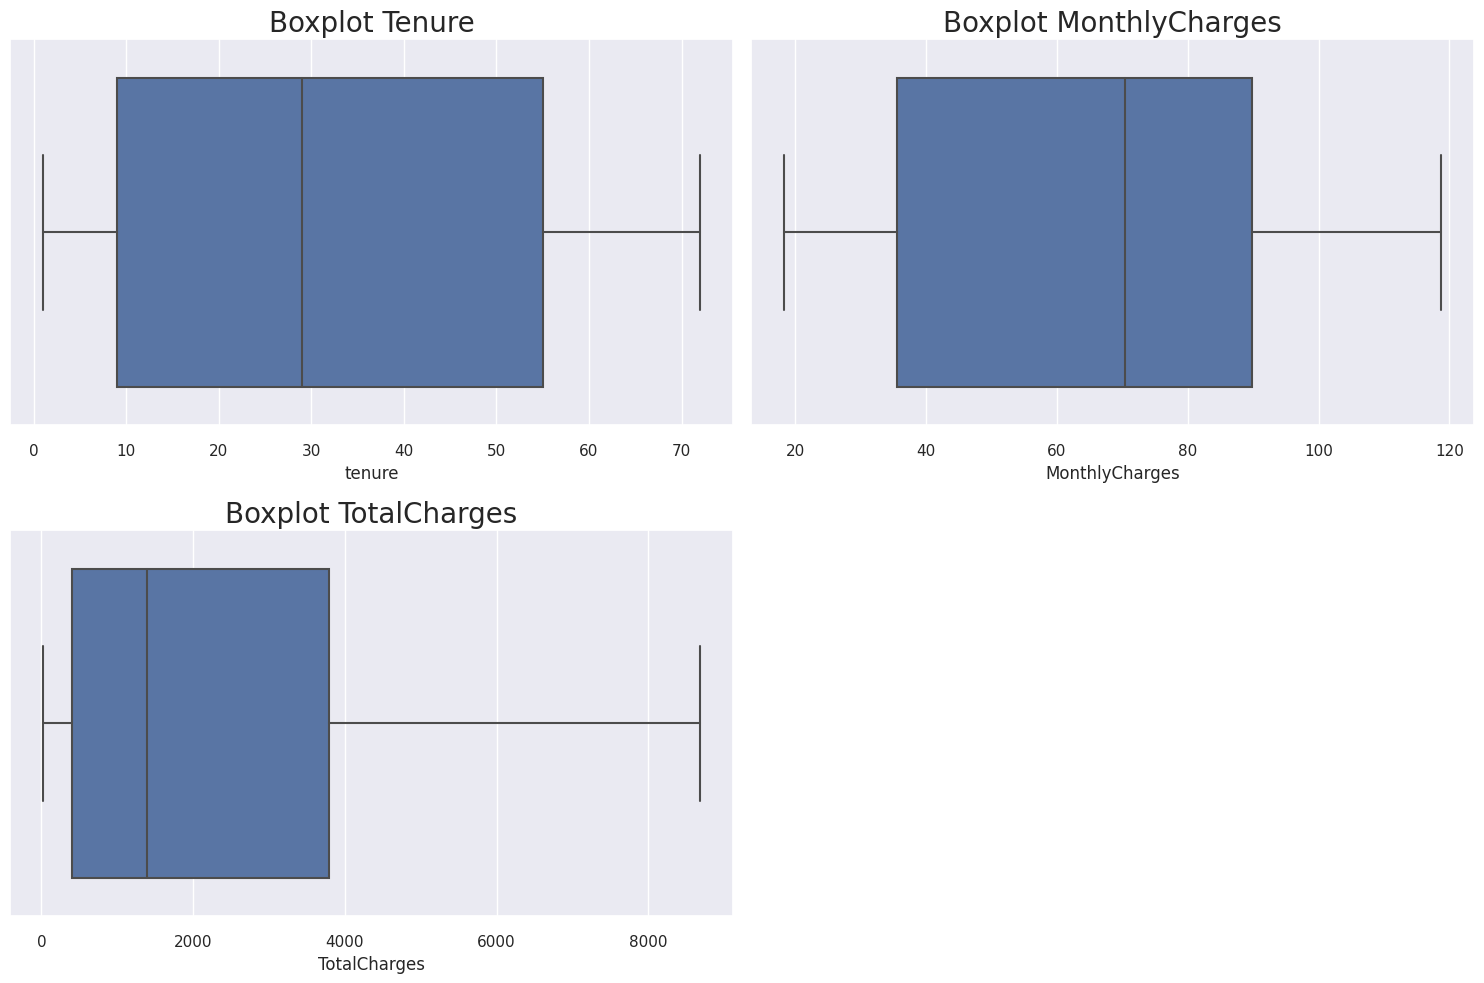

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1) 
sns.boxplot(x=df["tenure"])
plt.title("Boxplot Tenure", fontdict={'fontsize': 20})

plt.subplot(2, 2, 2)  
sns.boxplot(x=df["MonthlyCharges"])
plt.title("Boxplot MonthlyCharges", fontdict={'fontsize': 20})

plt.subplot(2, 2, 3)  
sns.boxplot(x=df["TotalCharges"])
plt.title("Boxplot TotalCharges", fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()

#### Bivariate Analysis

#### Beginning our bivariate analysis of our variables, we start by examining our target variable, which is Churn (whether the customer has stopped being a client). Let’s go over our categorical variables:

- Gender: When we observe the gender variable, we see similar trends across both genders, indicating that there isn’t a particular gender more likely to churn. This variable is fairly balanced.

- Senior Citizen: Here, a different pattern emerges. Despite having far fewer elderly clients, they show a higher likelihood of churning. This presents a potential strategic focus area on elderly clients.

- Partner: Similar to the Senior Citizen variable, though with a less pronounced effect, we see that individuals in relationships are more likely to churn.

- Dependents: This variable reveals an interesting pattern. Clients without dependents are more likely to churn than those with dependents. This may be because clients with dependents are more inclined to maintain services for family members.

- Phone Service: This is an important variable because we have groups with and without phone service, though the behavior across this variable is balanced.

- Multiple Lines: A balanced variable where no particular behavior favors one outcome over the other.

- Internet Service: A noteworthy behavior is evident here. Clients without internet service have a low churn likelihood, while nearly 50% of fiber-optic users are likely to churn, suggesting a potential issue with fiber-optic services, possibly due to cost or service quality.

- Online Security, Device Protection, and Tech Support: Clients with internet service who do not subscribe to Online Security are significantly more likely to churn compared to those who do, and we observe the same trend for Device Protection and Tech Support.

- Online Backup: Approximately 40% of customers are likely to cancel this service, indicating a possible issue with it.

- Streaming TV and Streaming Movies: For both services, clients without streaming subscriptions are more likely to churn.

- Contract: This is a key variable, showing that over half of our churned clients are those with a month-to-month contract.

- Payment Method: Another variable with a distinct pattern, showing that 50% of customers using automatic bank transfers tend to churn, which warrants further analysis.

#### Conclusion: In summary, we identify a few strategic paths. Most churn-prone clients are elderly and/or without dependents. Certain services also require attention, as customers with fiber-optic and online backup services have higher churn rates. Conversely, clients with other additional services are more inclined to remain. Offering these services as package deals could help retention. Finally, contract length is significant, as the majority of churned clients are on month-to-month plans, suggesting an opportunity to convert them to longer-term contracts.

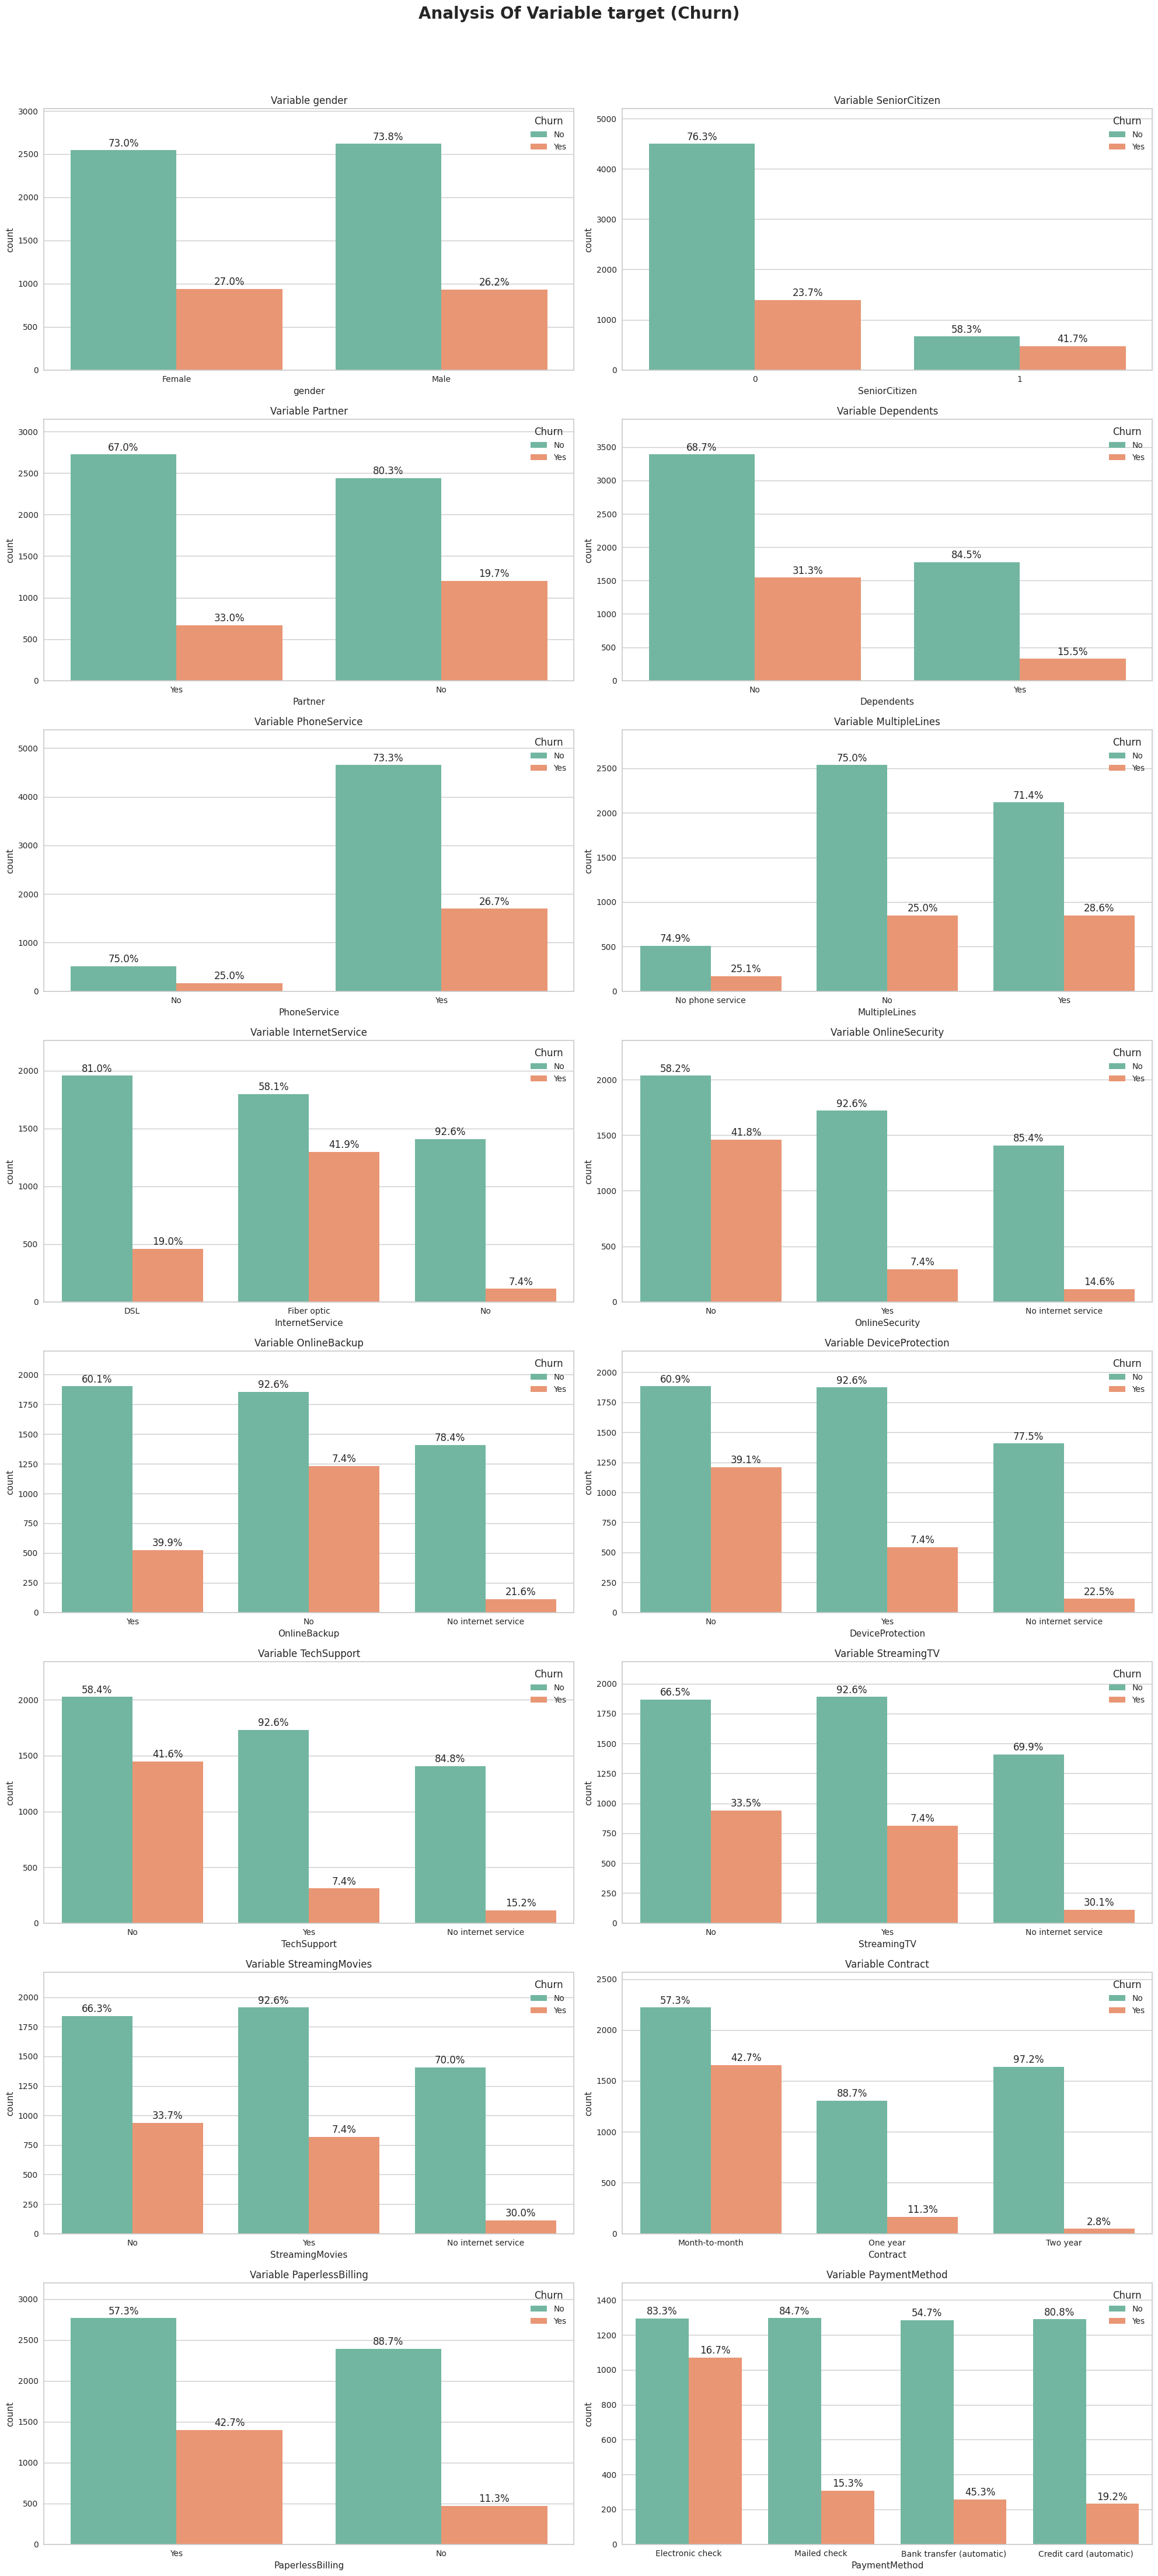

In [10]:
def add_percentage_by_group(ax, data, x, hue):
    counts = data.groupby([x, hue]).size().unstack(fill_value=0)
    
    percentages = counts.apply(lambda c: c / c.sum() * 100, axis=1)
    

    hue_order = ax.legend_.get_texts()
    hue_labels = [t.get_text() for t in hue_order]
    
    for i, c in enumerate(ax.containers):
        labels = []
        for j, v in enumerate(c):
            height = v.get_height()
            if height > 0:
                try:
                    percentage = percentages.iloc[j, percentages.columns.get_loc(hue_labels[i])]
                except KeyError:
                    percentage = percentages.iloc[j, i]
                labels.append(f'{percentage:.1f}%')
            else:
                labels.append('')
        ax.bar_label(c, labels=labels, label_type='edge', padding=2)

    plt.tight_layout()
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)  

plt.figure(figsize=(20, 45))
plt.suptitle("Analysis Of Variable target (Churn)", fontweight="bold", fontsize=20)

plt.subplot(8, 2, 1)
plt.gca().set_title('Variable gender')
ax1 = sns.countplot(x='gender', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax1, df, 'gender', 'Churn')

plt.subplot(8, 2, 2)
plt.gca().set_title('Variable SeniorCitizen')
ax2 = sns.countplot(x='SeniorCitizen', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax2, df, 'SeniorCitizen', 'Churn')

plt.subplot(8, 2, 3)
plt.gca().set_title('Variable Partner')
ax3 = sns.countplot(x='Partner', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax3, df, 'Partner', 'Churn')

plt.subplot(8, 2, 4)
plt.gca().set_title('Variable Dependents')
ax4 = sns.countplot(x='Dependents', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax4, df, 'Dependents', 'Churn')

plt.subplot(8, 2, 5)
plt.gca().set_title('Variable PhoneService')
ax5 = sns.countplot(x='PhoneService', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax5, df, 'PhoneService', 'Churn')

plt.subplot(8, 2, 6)
plt.gca().set_title('Variable MultipleLines')
ax6 = sns.countplot(x='MultipleLines', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax6, df, 'MultipleLines', 'Churn')

plt.subplot(8, 2, 7)
plt.gca().set_title('Variable InternetService')
ax7 = sns.countplot(x='InternetService', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax7, df, 'InternetService', 'Churn')

plt.subplot(8, 2, 8)
plt.gca().set_title('Variable OnlineSecurity')
ax8 = sns.countplot(x='OnlineSecurity', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax8, df, 'OnlineSecurity', 'Churn')

plt.subplot(8, 2, 9)
plt.gca().set_title('Variable OnlineBackup')
ax9 = sns.countplot(x='OnlineBackup', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax9, df, 'OnlineBackup', 'Churn')

plt.subplot(8, 2, 10)
plt.gca().set_title('Variable DeviceProtection')
ax10 = sns.countplot(x='DeviceProtection', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax10, df, 'DeviceProtection', 'Churn')

plt.subplot(8, 2, 11)
plt.gca().set_title('Variable TechSupport')
ax11 = sns.countplot(x='TechSupport', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax11, df, 'TechSupport', 'Churn')

plt.subplot(8, 2, 12)
plt.gca().set_title('Variable StreamingTV')
ax12 = sns.countplot(x='StreamingTV', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax12, df, 'StreamingTV', 'Churn')

plt.subplot(8, 2, 13)
plt.gca().set_title('Variable StreamingMovies')
ax13 = sns.countplot(x='StreamingMovies', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax13, df, 'StreamingMovies', 'Churn')

plt.subplot(8, 2, 14)
plt.gca().set_title('Variable Contract')
ax14 = sns.countplot(x='Contract', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax14, df, 'Contract', 'Churn')

plt.subplot(8, 2, 15)
plt.gca().set_title('Variable PaperlessBilling')
ax15 = sns.countplot(x='PaperlessBilling', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax15, df, 'Contract', 'Churn')

plt.subplot(8, 2, 16)
plt.gca().set_title('Variable PaymentMethod')
ax16 = sns.countplot(x='PaymentMethod', hue='Churn', palette='Set2', data=df)
add_percentage_by_group(ax16, df, 'PaymentMethod', 'Churn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Now, discussing our continuous variables:

- Tenure: Here, we observe that, despite having clients across various usage profiles, the majority of those who churn have been using the services for fewer months, which makes sense.

- Monthly Charges: Another variable that aligns logically with our findings; we see that most of our cancellations come from clients with higher monthly spending.

- Total Charges: Clients who have spent less with the company in total are more likely to churn, which aligns with what we see in the Tenure variable. Although clients with higher bills are more prone to churn, clients with shorter tenures are also more likely to leave. We may explore these patterns further for confirmation.

#### Conclusion: In conclusion, these findings reveal several patterns that are logical and actionable. Newer clients are more likely to churn, while long-term clients tend to remain. Monthly charges show that clients with higher bills are more likely to leave, suggesting a potential opportunity to offer promotional discounts to this group. Finally, when we examine Total Charges, we see that clients with lower overall spending are more likely to churn, which aligns with the observation that month-to-month contract clients also exhibit higher churn rates.

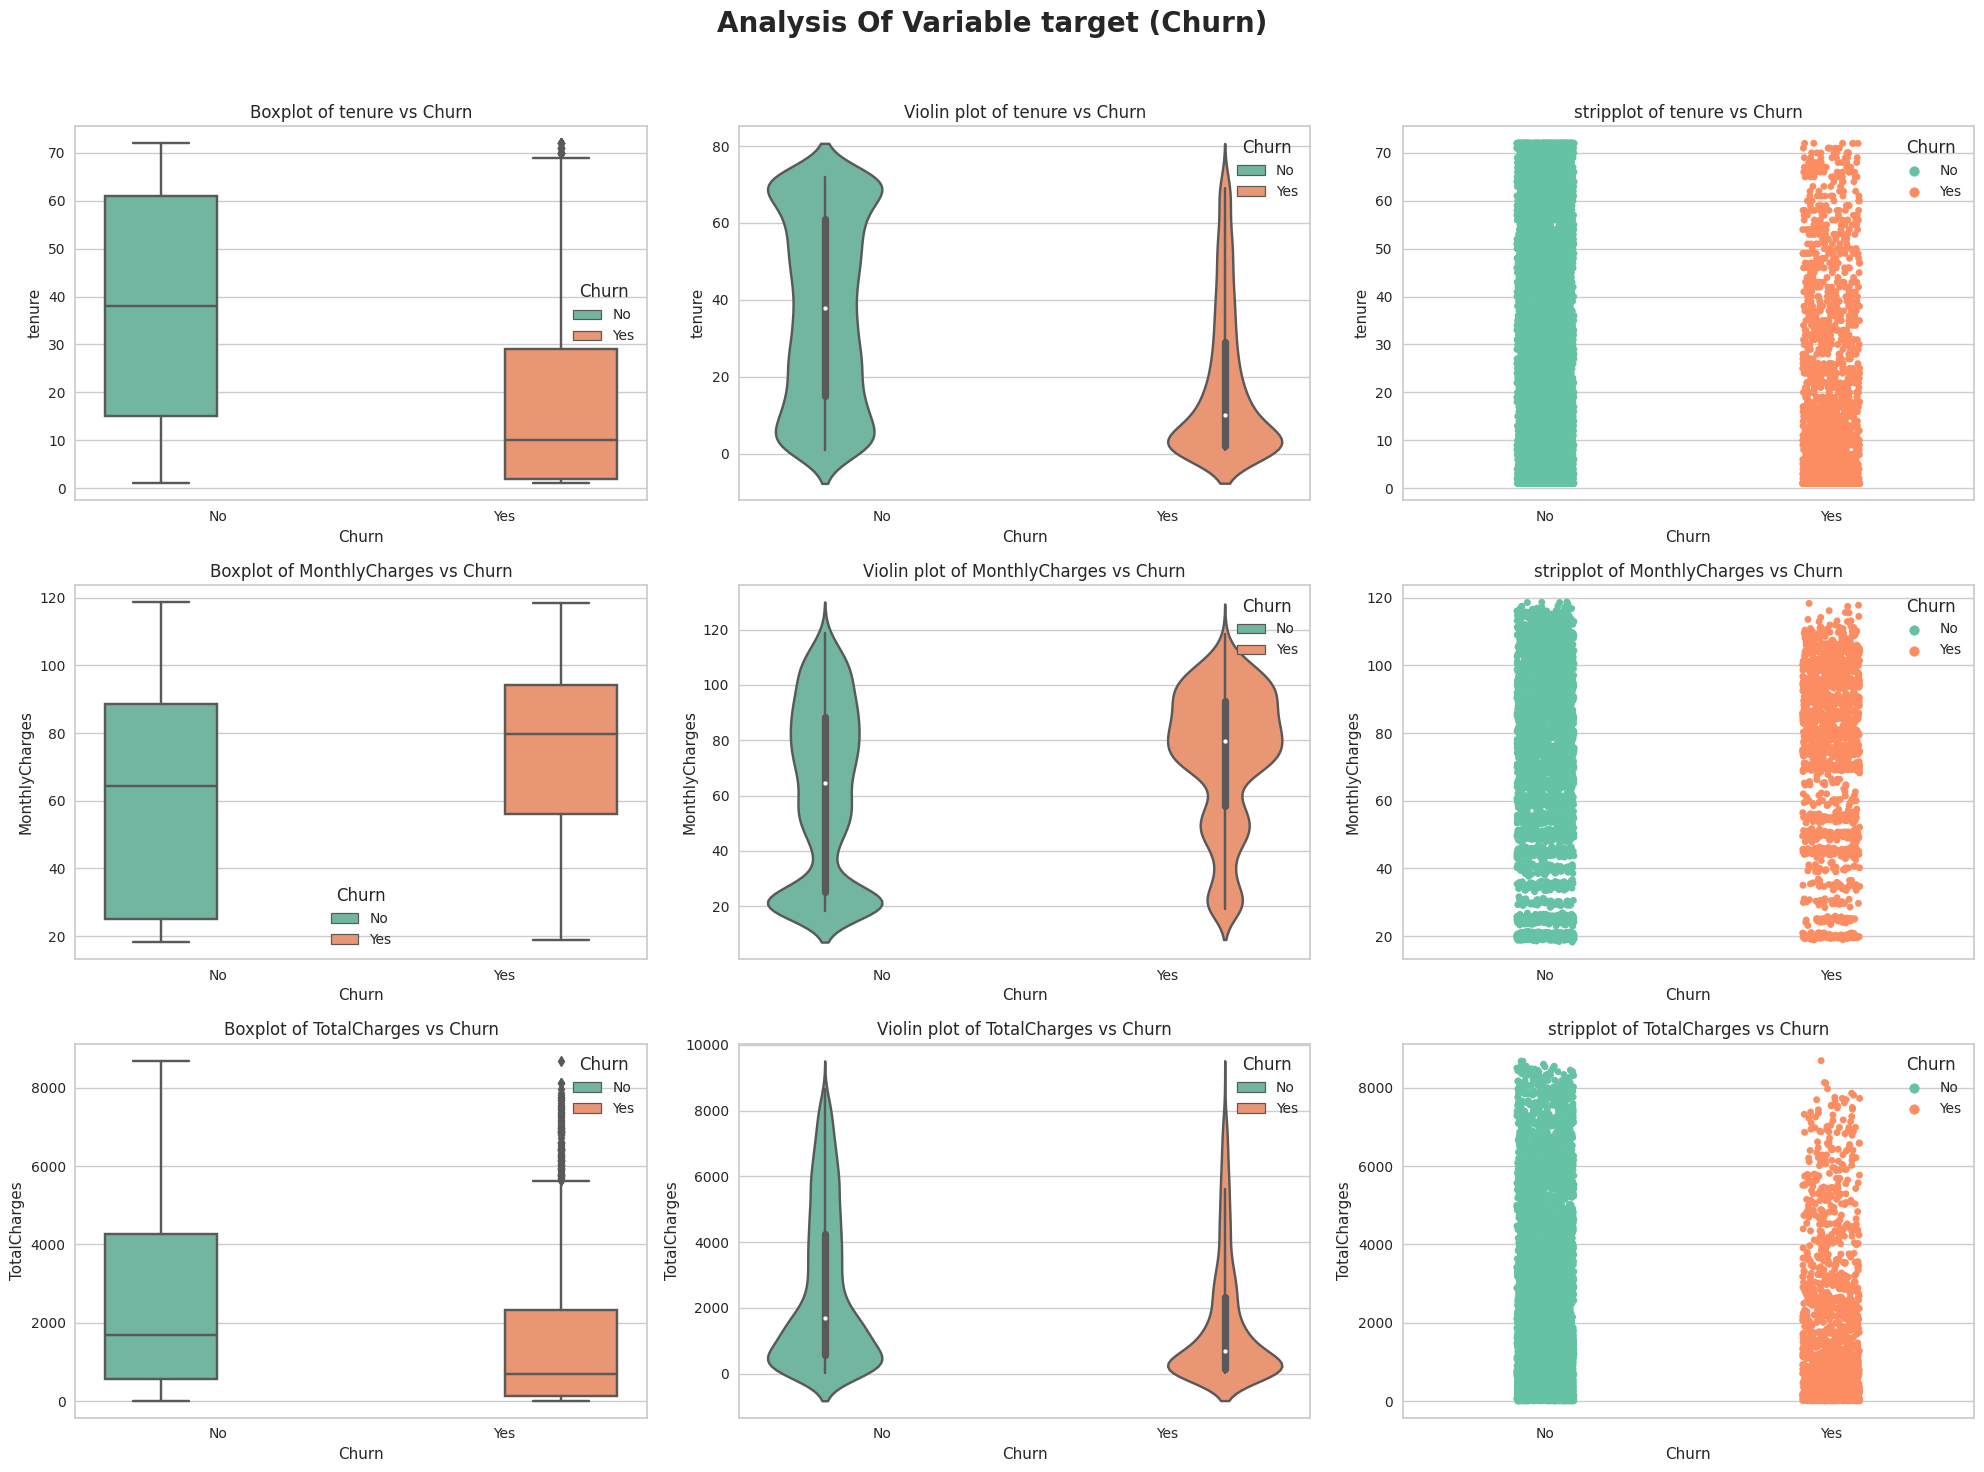

In [13]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable target (Churn)", fontweight="bold", fontsize=20)

plt.subplot(3,3,1)
sns.boxplot(x='Churn', y='tenure', data=df, hue= "Churn", palette='Set2')
plt.title('Boxplot of tenure vs Churn')

plt.subplot(3, 3, 2)
sns.violinplot(x='Churn', y='tenure', data=df, hue="Churn", palette='Set2')
plt.title('Violin plot of tenure vs Churn')

plt.subplot(3, 3, 3)
sns.stripplot(x='Churn', y='tenure', data=df, hue="Churn", palette='Set2')
plt.title('stripplot of tenure vs Churn')

plt.subplot(3,3,4)
sns.boxplot(x='Churn', y='MonthlyCharges', data= df, hue= "Churn", palette='Set2')
plt.title('Boxplot of MonthlyCharges vs Churn')

plt.subplot(3, 3, 5)
sns.violinplot(x='Churn', y='MonthlyCharges', data= df, hue="Churn", palette='Set2')
plt.title('Violin plot of MonthlyCharges vs Churn')

plt.subplot(3, 3, 6)
sns.stripplot(x='Churn', y='MonthlyCharges', data= df, hue="Churn", palette='Set2')
plt.title('stripplot of MonthlyCharges vs Churn')

plt.subplot(3,3,7)
sns.boxplot(x='Churn', y='TotalCharges', data= df, hue= "Churn", palette='Set2')
plt.title('Boxplot of TotalCharges vs Churn')

plt.subplot(3, 3, 8)
sns.violinplot(x='Churn', y='TotalCharges', data= df, hue="Churn", palette='Set2')
plt.title('Violin plot of TotalCharges vs Churn')

plt.subplot(3, 3, 9)
sns.stripplot(x='Churn', y='TotalCharges', data= df, hue="Churn", palette='Set2')
plt.title('stripplot of TotalCharges vs Churn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Looking at the Tenure variable, we can confirm our earlier observation: the longer a client stays, the more likely they are to remain with the company. The same trend applies to Total Charges; shorter tenure corresponds to lower total spending, reaffirming that clients with lower total spending are more likely to churn. Comparing this with Monthly Charges further confirms that most of our churned clients are those with shorter tenures and higher monthly bills.

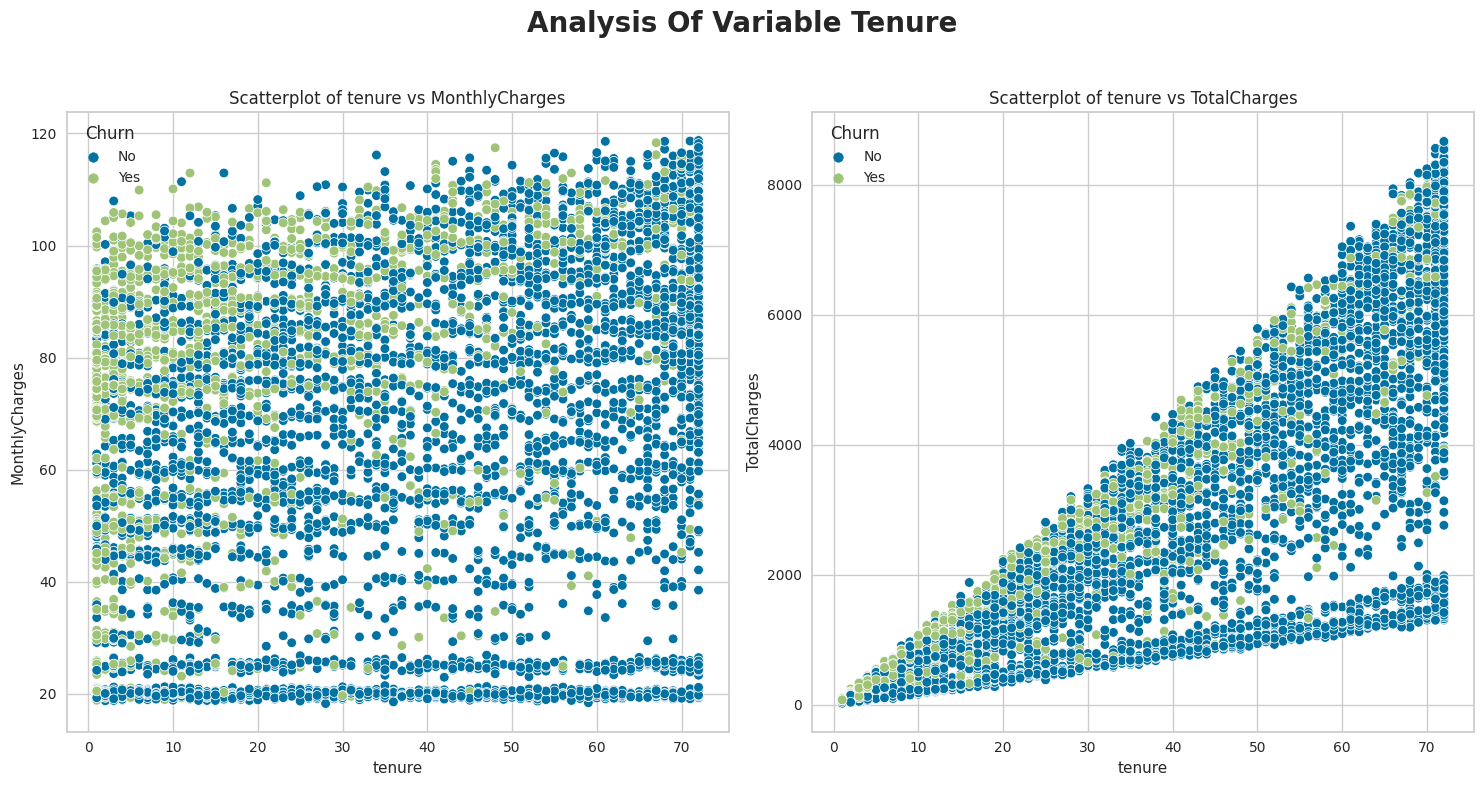

In [18]:
plt.figure(figsize=(15, 8))
plt.suptitle("Analysis Of Variable Tenure", fontweight="bold", fontsize=20)

# Lista para armazenar os eixos
axes = []

# Primeiro gráfico: Scatterplot
axes.append(plt.subplot(1, 2, 1))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue="Churn", data=df)
plt.title('Scatterplot of tenure vs MonthlyCharges')

axes.append(plt.subplot(1, 2, 2))
sns.scatterplot(x='tenure', y='TotalCharges', hue="Churn", data=df)
plt.title('Scatterplot of tenure vs TotalCharges')


for ax in axes:
    ax.ticklabel_format(style='plain', axis='both')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout
plt.show()


#### Looking at some variables of interest from our exploratory analysis, we observe several patterns. As noted earlier, clients with higher monthly bills are more likely to cancel the service, and fiber optic users also show a higher likelihood of churning. When we examine this variable alongside monthly charges, we see that, on average, fiber optic costs nearly double that of other internet services, confirming our exploratory analysis findings. However, when we look at the Online Backup variable, we do not observe the same behavior.

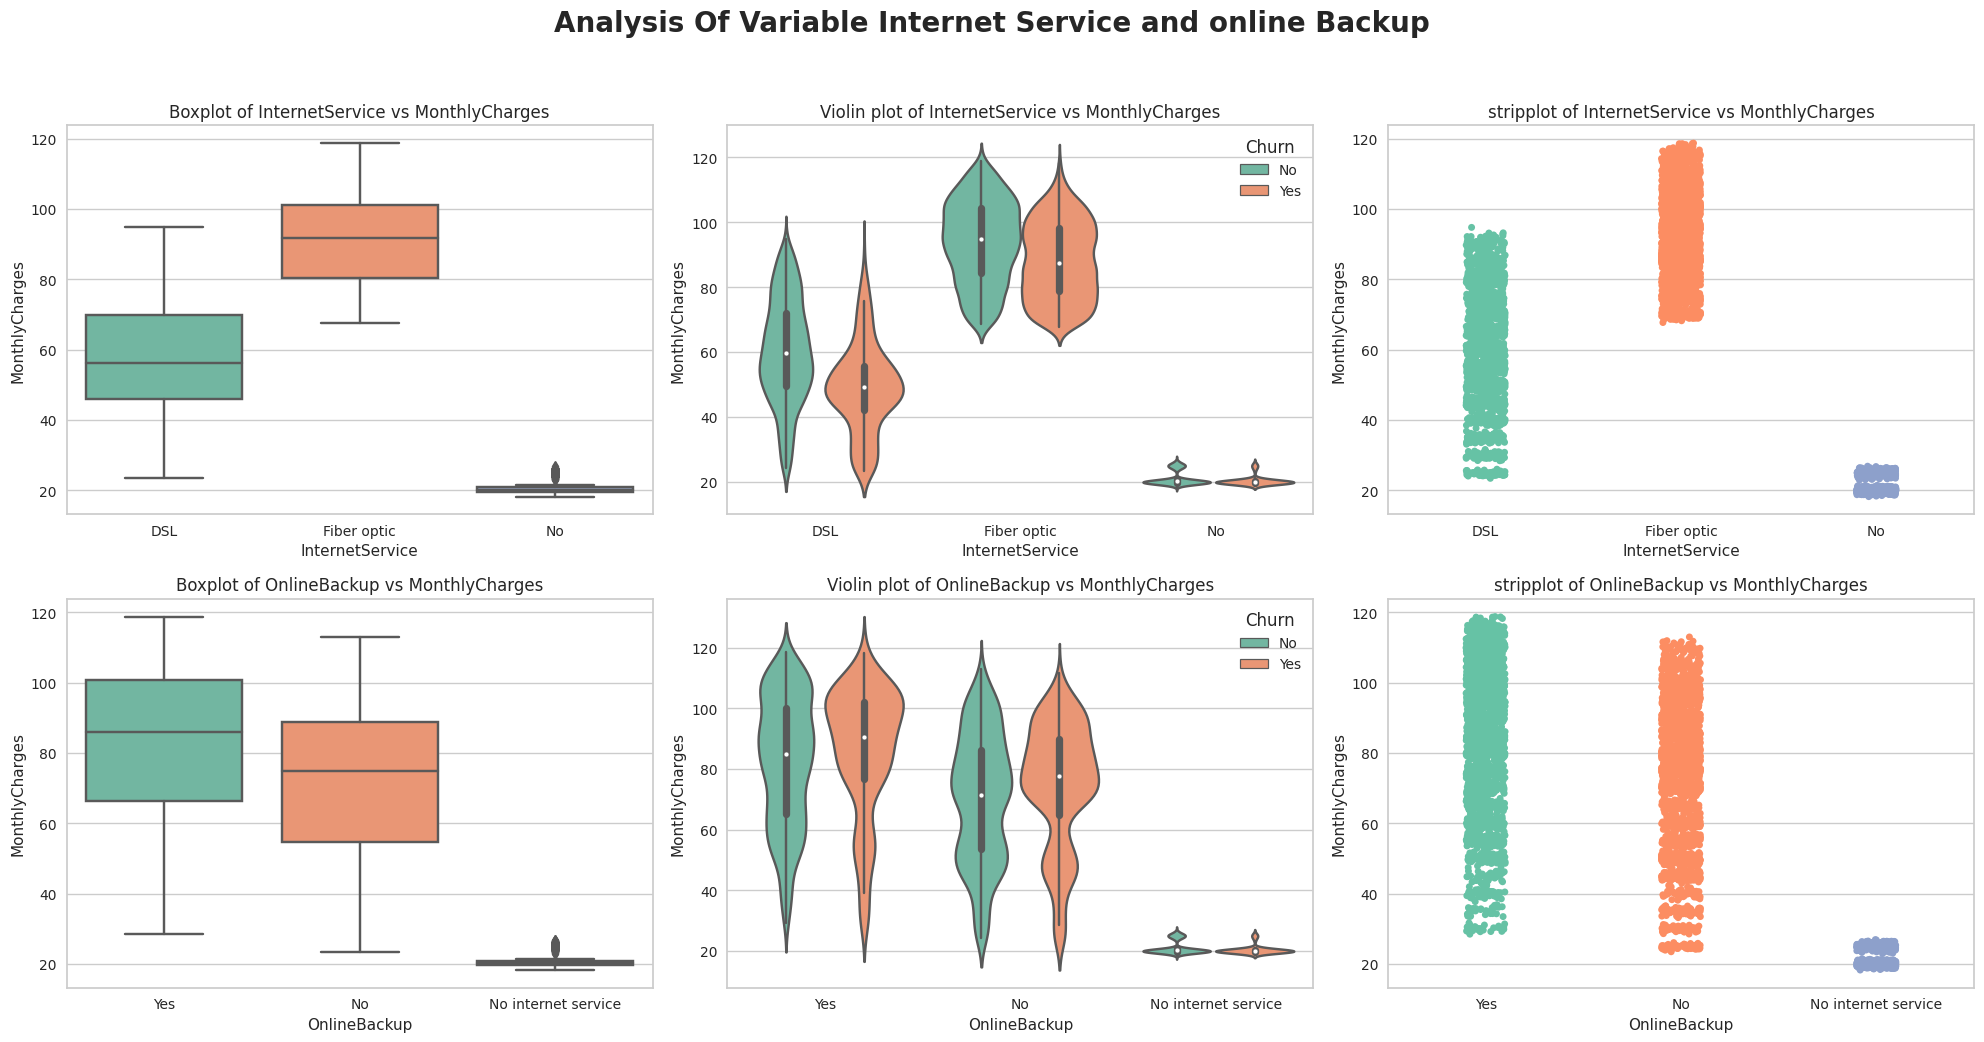

In [25]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable Internet Service and online Backup", fontweight="bold", fontsize=20)

plt.subplot(3,3,1)
sns.boxplot(x='InternetService', y='MonthlyCharges',data=df, palette='Set2')
plt.title('Boxplot of InternetService vs MonthlyCharges')

plt.subplot(3, 3, 2)
sns.violinplot(x='InternetService', y='MonthlyCharges', data=df, hue="Churn", palette='Set2')
plt.title('Violin plot of InternetService vs MonthlyCharges')

plt.subplot(3, 3, 3)
sns.stripplot(x='InternetService', y='MonthlyCharges', data=df, palette='Set2')
plt.title('stripplot of InternetService vs MonthlyCharges')

plt.subplot(3,3,4)
sns.boxplot(x='OnlineBackup', y='MonthlyCharges', data= df, palette='Set2')
plt.title('Boxplot of OnlineBackup vs MonthlyCharges')

plt.subplot(3, 3, 5)
sns.violinplot(x='OnlineBackup', y='MonthlyCharges', data= df, hue="Churn", palette='Set2')
plt.title('Violin plot of OnlineBackup vs MonthlyCharges')

plt.subplot(3, 3, 6)
sns.stripplot(x='OnlineBackup', y='MonthlyCharges', data= df, palette='Set2')
plt.title('stripplot of OnlineBackup vs MonthlyCharges')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## <font color='blue'> 3. Model Building. </font>

In [116]:
df = df.drop("customerID", axis = 1)

#### Label Encoder
- Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [117]:
label_encoder_gender = LabelEncoder()
label_encoder_Partner = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_PhoneService = LabelEncoder()
label_encoder_MultipleLines = LabelEncoder()
label_encoder_InternetService = LabelEncoder()
label_encoder_OnlineSecurity = LabelEncoder()
label_encoder_OnlineBackup = LabelEncoder()
label_encoder_DeviceProtection = LabelEncoder()
label_encoder_TechSupport = LabelEncoder()
label_encoder_StreamingTV = LabelEncoder()
label_encoder_StreamingMovies = LabelEncoder()
label_encoder_Contract = LabelEncoder()
label_encoder_PaperlessBilling = LabelEncoder()
label_encoder_PaymentMethod= LabelEncoder()
label_encoder_churn= LabelEncoder()


df['gender'] = label_encoder_gender.fit_transform(df['gender'])
df['Partner'] = label_encoder_Partner.fit_transform(df['Partner'])
df['Dependents'] = label_encoder_Dependents.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder_PhoneService.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder_MultipleLines.fit_transform(df['MultipleLines'])
df['InternetService'] = label_encoder_InternetService.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder_OnlineSecurity.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder_OnlineBackup.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder_DeviceProtection.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder_TechSupport.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder_StreamingTV.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder_StreamingMovies.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder_Contract.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder_PaperlessBilling.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder_PaymentMethod.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder_churn.fit_transform(df['Churn'])

#### Separating into features variables and target variable.

In [118]:
X = df.drop('Churn', axis = 1)
X = X.values
y = df['Churn']

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Naive Bayes
- Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

#### Running our first model, we achieved a solid accuracy of 75%, but this was misleading. The model performed well in predicting negative cases. However, since our goal is to predict positive outcomes—specifically, users who have churned—the model did not perform well in this area, with only 52% accuracy in predicting these users. On a positive note, the model’s recall was strong: when it predicted that a customer would churn, it was correct 74% of the time.

0.7549763033175355

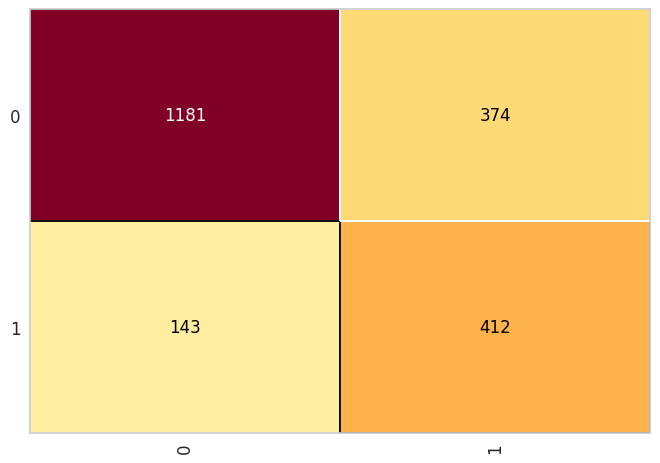

In [121]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [122]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1555
           1       0.52      0.74      0.61       555

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.77      2110



In [123]:
score_naive_gaussian = 0.7549763033175355

#### Decision Tree
- Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.
- Here we are applying GridSearch to check which are the best metrics to use.

In [124]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  5
Algorithm:  gini
Score:  0.784843541762657


##### Running Decision Tree.

#### Running the second Decision Tree model, we achieved similar results to Naive Bayes in predicting negative outcomes—the model performed very well in this area. However, when it comes to predicting the positive outcomes we are targeting, we observed a slightly improved (though still suboptimal) accuracy of 60% for positive predictions. Nonetheless, the model produced significantly more false positives, resulting in a decrease in recall.

0.7881516587677725

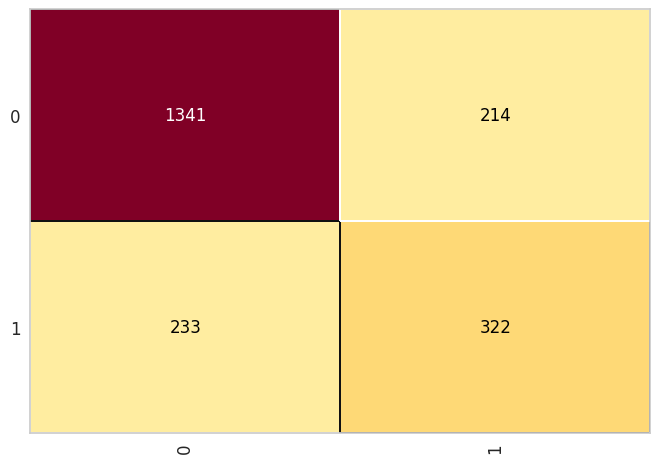

In [125]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 5, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [126]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1555
           1       0.60      0.58      0.59       555

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [127]:
score_tree = 0.7881516587677725

In [128]:
columns = df.drop('Churn', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Contract            0.530370
tenure              0.134170
OnlineSecurity      0.122386
InternetService     0.085383
TotalCharges        0.062327
MonthlyCharges      0.042250
OnlineBackup        0.009314
PhoneService        0.005315
StreamingMovies     0.005143
gender              0.002275
PaperlessBilling    0.001067
MultipleLines       0.000000
SeniorCitizen       0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
Dependents          0.000000
PaymentMethod       0.000000
Partner             0.000000
dtype: float64

#### RandomForest
- Here we will use the Random Forest Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [129]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8047548594775288
Mín Split:  4
Max Nvl:  6


##### Running Random Forest

#### In the Random Forest model, we again confirmed strong performance in predicting negative outcomes. When it comes to positive predictions, it achieved the best accuracy so far, with 66% (though this is still not an ideal result). However, when examining the false positives, the model’s performance dropped significantly, with an accuracy of only 48%.

0.7985781990521327

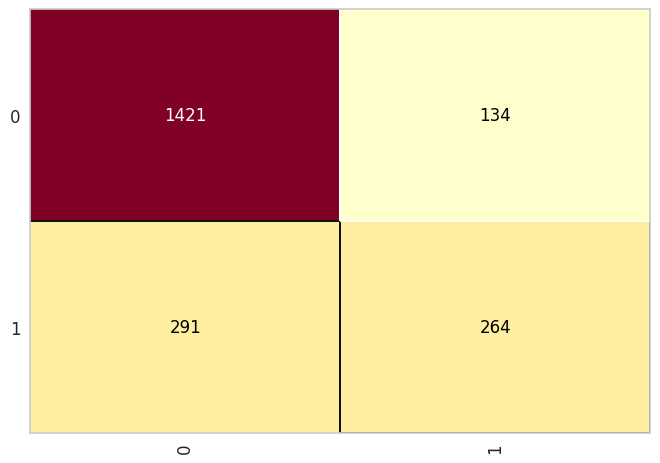

In [130]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 6,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_report_result = classification_report(y_test, previsoes)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [131]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.66      0.48      0.55       555

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [132]:
score_random = 0.7985781990521327

In [133]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Contract            0.195625
tenure              0.168281
TotalCharges        0.119219
TechSupport         0.100013
MonthlyCharges      0.092854
OnlineSecurity      0.087289
InternetService     0.051561
OnlineBackup        0.039168
PaymentMethod       0.038562
PaperlessBilling    0.025875
DeviceProtection    0.022038
SeniorCitizen       0.014650
MultipleLines       0.011215
StreamingTV         0.008442
StreamingMovies     0.008326
Dependents          0.006926
gender              0.003850
Partner             0.003646
PhoneService        0.002458
dtype: float64

#### K-Neighbors
- Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Here we will use the GridSearch to figure out the best metrics to use in this model.

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 9}, 0.7765136123527021)

##### Running K-Neighbors.

#### In the KNN model, we observed the same pattern: the model is effective in predicting negative outcomes but performs poorly in predicting positive outcomes. Both accuracy and recall were low for the positive predictions.

0.7791469194312797

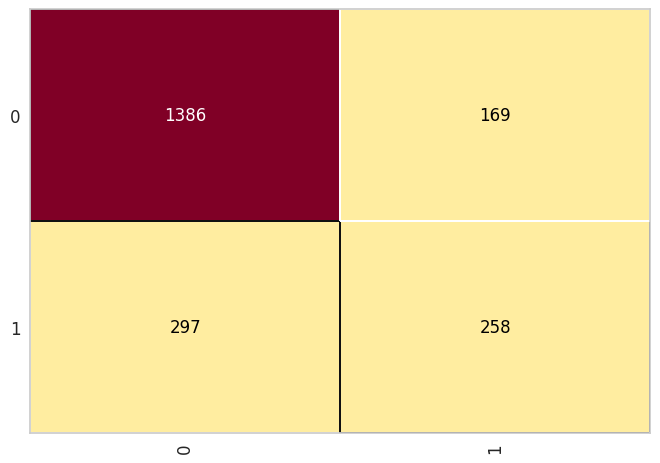

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 1)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_report_result = classification_report(y_test, previsoes)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [136]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1555
           1       0.60      0.46      0.53       555

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [138]:
score_knn = 0.7791469194312797

#### Logistic Regression
- Here we will use the Linear Regression Model.

#### In the Linear Regression model, we observed the same behavior as in the previous models: good performance for negative outcomes but poor performance for positive outcomes.

0.7971563981042654

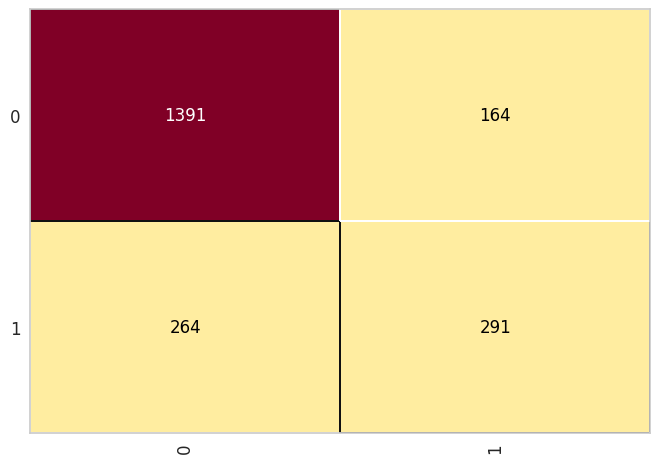

In [139]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_report_result = classification_report(y_test, previsoes)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [140]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.52      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [152]:
logistic_normal = 0.7971563981042654

#### AdaBoost
- Here we will use the AdaBoost Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Applying GridSearch

In [142]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.001, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 2, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.09
Score:  0.8045509955302722


##### Running AdaBoost.

#### In the AdaBoost, we observed the same behavior as in the previous models: good performance for negative outcomes but poor performance for positive outcomes.

0.8028436018957346

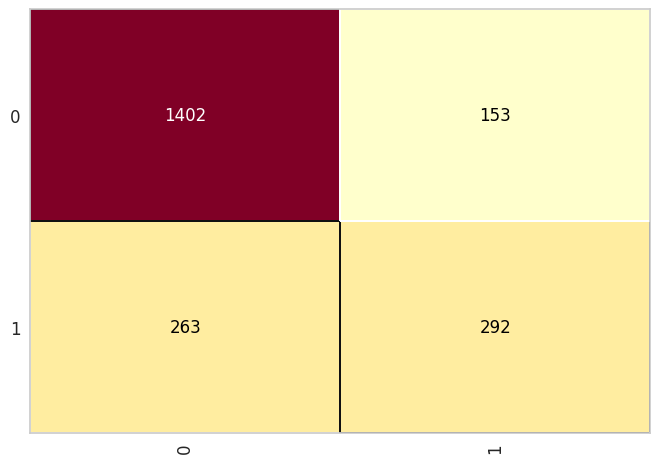

In [143]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate =  0.09, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_report_result = classification_report(y_test, previsoes)

cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [144]:
classification_ada_scaler = (classification_report(y_test, previsoes))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.66      0.53      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [146]:
score_ada_scaler = 0.8028436018957346

##### Checking key variables to predict the outcome.

##### Chi-2

#### When we look at the most important variables selected by our machine learning models to make the final prediction, we can confirm that the key variables were, in essence, the type of contract, the number of months the customer has been using the company’s services, and the amount of money spent with the company.When we look at the most important variables selected by our machine learning models to make the final prediction, we can confirm that the key variables were, in essence, the type of contract, the number of months the customer has been using the company’s services, and the amount of money spent with the company.

In [147]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
TotalCharges,629630.81
tenure,16377.33
MonthlyCharges,3653.07
Contract,1111.76
OnlineSecurity,550.44
TechSupport,522.16
OnlineBackup,229.44
DeviceProtection,190.69
SeniorCitizen,133.48
Dependents,131.27


##### Decision Tree

In [148]:
feature_imp

Contract            0.530370
tenure              0.134170
OnlineSecurity      0.122386
InternetService     0.085383
TotalCharges        0.062327
MonthlyCharges      0.042250
OnlineBackup        0.009314
PhoneService        0.005315
StreamingMovies     0.005143
gender              0.002275
PaperlessBilling    0.001067
MultipleLines       0.000000
SeniorCitizen       0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
Dependents          0.000000
PaymentMethod       0.000000
Partner             0.000000
dtype: float64

##### Random Forest

In [149]:
feature_imp_random

Contract            0.195625
tenure              0.168281
TotalCharges        0.119219
TechSupport         0.100013
MonthlyCharges      0.092854
OnlineSecurity      0.087289
InternetService     0.051561
OnlineBackup        0.039168
PaymentMethod       0.038562
PaperlessBilling    0.025875
DeviceProtection    0.022038
SeniorCitizen       0.014650
MultipleLines       0.011215
StreamingTV         0.008442
StreamingMovies     0.008326
Dependents          0.006926
gender              0.003850
Partner             0.003646
PhoneService        0.002458
dtype: float64

In [153]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}


KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,KNN,Logistic Regression,AdaBoost
Model,Naive Bayes,Decision Tree,Random Forest,KNN,Logistic Regression,AdaBoost
Scaling,Normal Data,Normal Data,Normal Data,Normal,Normal Data,StandardScaler
Type,Gaussian,Gini,Gini,-,-,-
Precision,0.754976,0.788152,0.798578,0.779147,0.797156,0.802844


## <font color='blue'> 4. Conclusion. </font>

#### Talking about our project, we have a dataset provided to us by a telecommunications company, containing information about the company’s customers. Our objective is to predict whether a customer will churn, in order to understand the behaviors of these customers, so that the company can retain them and encourage them to continue using its services.

#### Although we have a lot of information about the customers, such as gender, services provided, account value, and personal details, the dataset is not very large. We have 21 columns, which can be considered a good amount of information, but only 7,043 customers, which makes our task a bit more challenging. We don't have a large enough sample for analysis. Looking at our dataset, we can see that there are no missing values, which means there is no need for data imputation.

#### Starting our exploratory data analysis (EDA) of the categorical variables to understand more about the behavior of our customers, we can see some important insights. Our dataset is fairly balanced between male and female customers, most of our customers are not considered elderly, the data is well balanced between customers who have a partner and those who don’t, and most of our customers don’t have dependents.

#### When we look at our service variables, we can see that our customers are well balanced between those with multiple lines and those with just one. The majority of our customers have an internet service, and when looking at the services we offer, we see that some services, like streaming, have more customers, while others have fewer customers. As for the rest of the categorical variables, we can see that more than half of our customers have monthly payment contracts, and when we examine our target variable, we find that 73% of our customers continued with the service, while 27% churned.

#### When we examine our continuous variables, we can see that 50% of our customers have been with the company for less than 30 months, and 25% have been with the company for more than 55 months. Looking at our monthly payment variable, we observe that the median payment is around 70 per month, but we also see that 25% of our customers have lower bills, up to 40 per month. When we look at the total charges, we confirm that the majority of our customers have spent less with the company, but we also have customers who have spent significantly more.

#### Moving on to our bivariate analysis and comparing our variables with the target variable, we can draw several insights. We can confirm that elderly customers are more likely to churn than younger customers. People who have a partner are also more likely to churn than those without a partner. An interesting insight is that, despite people with partners being more likely to churn, those with dependents are less likely to cancel. We might hypothesize that people with dependents prefer to keep the service for their children. Another variable that stood out was the internet service variable, where we confirm that users with fiber optic connections are much more likely to cancel than other users. When we compare this variable with the price, we see that this service is more expensive than others, which leads us to wonder if the higher cancellation rate is due to the price or poor service quality. We can also confirm that people with services like streaming are much less likely to cancel the service. Another important variable we analyzed was the type of contract: month-to-month customers are much more likely to cancel than those with long-term contracts, which makes a lot of sense.

#### When we examine our continuous variables, we can see that customers who have been with the company longer are less likely to churn, and cancellations generally come from customers with less time consuming services from the company. We can also confirm that customers with higher monthly bills are more likely to cancel than those with lower bills. We observe a similar behavior in the total charges variable, which aligns with what we see in the customer tenure analysis. Customers who have spent less with the company are more likely to churn than those who have spent more, further confirming the view that customers with shorter tenure are more likely to cancel. When we compare the tenure variable with the price variables, we can confirm that customers with less time and higher monthly bills are much more likely to churn.

#### The conclusion we can draw from our exploratory analysis is that we need to focus on retaining customers with less time with the company. We can observe that these are usually customers with month-to-month contracts and higher bills. One approach might be to offer an annual plan at lower prices to try to retain these customers for a longer period. We could also consider offering a plan that provides more services, as we found that customers with more services are less likely to cancel. We also noticed that fiber optic service has a high churn rate, so we might need to think about what can be done to address this. Additionally, we should consider strategies for older customers, who are much more likely to churn than younger customers.

#### Talking about the machine learning part, I attempted some preprocessing steps. I tried using one-hot encoding and label encoding, and I also tried selecting the most important variables. Additionally, I reduced the number of classes by changing "no service" to "no", leaving only two classes—whether the customer has the service or not. I also tried class balancing through oversampling to see if it would lead to better results. We split our dataset into 70% for training and 30% for testing.

#### When we started running the machine learning models, we noticed a pattern among them. Most of the models performed very well in predicting negative outcomes but not the positive ones, which is our main goal—predicting whether a customer will churn. In terms of accuracy, we managed to achieve models with up to 80% accuracy, but this was a "false" accuracy, as most of this percentage came from predicting negative outcomes. Some models, like Random Forest, achieved reasonable accuracy for predicting positive outcomes, with 66% accuracy, but had poor recall, with a rate of 48%. This means the model flagged many false positives, predicting that customers would churn when they actually didn’t. Other models had lower accuracy but performed better in terms of recall.

#### When we look at the most important variables selected by our machine learning models to make the final prediction, we can confirm that these were the number of months the customer has been with the company, the type of contract, and the amount the customer has spent with the company—confirming the insights we obtained during exploratory analysis. I believe that with the limited amount of data, we couldn’t achieve satisfactory results in terms of prediction. While we could draw valuable insights from exploratory analysis, regarding the machine learning models, I believe that if we had more customers who churned to analyze, we could have achieved better results.